In [1]:
#Covid statistics: https://www.kaggle.com/sudalairajkumar/covid19-in-usa
#Health insurance statistics: https://www.commonwealthfund.org/publications/issue-briefs/2018/dec/cost-employer-insurance-growing-burden-middle-income-families
#The health insurance statistics in that article were summarized from a much larger dataset from the federal Medical Expenditure Panel Survey-Insurance Component (MEPS-IC)
#From the commonwealth study, the most recent insurance statistics were used (2016-2017) as a metric for the average costs of medical insurance plans for each state
#Two types of insurance data were included in this analysis due to their large difference in costs: single-payer health insurance and family
#I used these datasets to analyze how medical insurance costs related to the amount of tests performed in each state 
#Another idea that I wished to test was if higher medical insurance costs related to the number of reported COVID deaths in each state

In [120]:
#COVID-19 dataset
import numpy as np
import pandas as pd
df = pd.read_csv(r'State_covid_stats.csv')
df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200829,AK,6035.0,339660.0,NaN,43.0,NaN,NaN,NaN,7.0,...,345695,0,0,d14280fc719ed7f9365e0e046b0ac9ffd9a0b06b,0,0,0,0,0,NaN
1,20200829,AL,123889.0,851929.0,NaN,986.0,14267.0,NaN,1459.0,NaN,...,975818,45,0,668b17e7da32941aa4a95ef2775527e9e7d5d7a7,0,0,0,0,0,NaN
2,20200829,AR,60378.0,646592.0,NaN,407.0,4142.0,NaN,NaN,95.0,...,706970,16,0,19baf0f83cf44094d1194521bfebecbcdeaf6961,0,0,0,0,0,NaN
3,20200829,AS,0.0,1514.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1514,0,0,e063eb477b842be4d1532f74fc5371dd23ec577d,0,0,0,0,0,NaN
4,20200829,AZ,201287.0,991089.0,NaN,812.0,21433.0,262.0,NaN,164.0,...,1192376,29,5,d6aca9f355470d3f2ed666030c62bc76e880d557,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,20200126,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,d071f52c7b741eb47e42b29ec43d1fd5e5669698,0,0,0,0,0,NaN
9949,20200125,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,626988ec4dfe62f38d72dc25126a264411769056,0,0,0,0,0,NaN
9950,20200124,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,6f40087f42d06db4121e09b184785b4110cd4df8,0,0,0,0,0,NaN
9951,20200123,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,978c05d8a7a9d46e9fa826d83215f5b9732f2c6d,0,0,0,0,0,NaN


In [121]:
test = pd.DataFrame(df, columns= ['state','positive','negative','death'])
covid_stats = test.head(56) #shows the most recent test and death statistics from COVID for each state as of August 28th
covid_stats
#these are the main data entries that I will be using for the COVID dataset
#there are some territories present in the data set, such as the Virgin Islands, Guam and Puerto Rico that will not be used due to less available data

,state,positive,negative,death
0,AK,6035.0,339660.0,37.0
1,AL,123889.0,851929.0,2152.0
2,AR,60378.0,646592.0,772.0
3,AS,0.0,1514.0,0.0
4,AZ,201287.0,991089.0,5007.0
5,CA,693839.0,10415791.0,12834.0
6,CO,56773.0,642611.0,1843.0
7,CT,52495.0,1075011.0,4465.0
8,DC,13925.0,271831.0,605.0
9,DE,17349.0,215535.0,604.0


In [122]:
#in the family coverage dataset, there are two statistics for Hawii and one missing for Michigan. Based on how low single-payer cost was, and how Hawaii seems to have lower health insurance costs in general, the cheaper amount was given to Hawaii, while the more expensive point was given to Michigan
#the insurance data sets were altered to give them valid column headers and to replace the names of the states with their abbreviations. This was done manually in excel due to the difficulty in replacing them in pandas
single = pd.read_csv(r'Single_coverage.csv')
single = single.replace(',','', regex=True) #used to remove errors from the dataset
single['single_coverage'] = single['single_coverage'].astype(float)#converts all numbers from the column with the prices from strings to floats
family = pd.read_csv(r'family_coverage.csv')
family = family.replace(',','', regex=True) 
family['family_coverage'] = family['family_coverage'].astype(float)
single

,state,single_coverage
0,HI,675.0
1,ID,877.0
2,WA,903.0
3,OR,1023.0
4,UT,1094.0
5,MT,1122.0
6,WY,1155.0
7,ND,1182.0
8,KS,1219.0
9,AR,1253.0


In [123]:
#In this cell, I merge the datasets that I have acrued together in order to form a more comprehensive, final dataset.
half = pd.merge(covid_stats, single)
total = pd.merge(half, family) #this is the merged dataset. More extrapolation is needed to process the data, though.

#to complete my analysis, I first needed to get the total amount of tests performed in each state
total['total_tests'] = total['positive']+total['negative']

#I then formulated two columns based on a ratio of total tests divided by the average costs for single-person and family healthcare costs 

total['singleinsurance_test_ratio'] = total['total_tests'] / total['single_coverage']
total['familyinsurance_test_ratio'] = total['total_tests'] / total['family_coverage']

#I then make my final columns in the same way as the test statistics, only with mortality statistics. These statistics could serve to identify a trend similar to testing rates

total['singleinsurance_death_ratio'] = total['death'] / total['single_coverage']
total['familyinsurance_death_ratio'] = total['death'] / total['family_coverage']

total

,state,positive,negative,death,single_coverage,family_coverage,total_tests,singleinsurance_test_ratio,familyinsurance_test_ratio,singleinsurance_death_ratio,familyinsurance_death_ratio
0,AK,6035.0,339660.0,37.0,1514.0,6264.0,345695.0,228.332232,55.187580,0.024439,0.005907
1,AL,123889.0,851929.0,2152.0,1593.0,4640.0,975818.0,612.566227,210.305603,1.350910,0.463793
2,AR,60378.0,646592.0,772.0,1253.0,4748.0,706970.0,564.221868,148.898484,0.616121,0.162595
3,AZ,201287.0,991089.0,5007.0,1523.0,6006.0,1192376.0,782.912672,198.530803,3.287590,0.833666
4,CA,693839.0,10415791.0,12834.0,1433.0,5359.0,11109630.0,7752.707606,2073.078933,8.956036,2.394850
5,CO,56773.0,642611.0,1843.0,1375.0,5267.0,699384.0,508.642909,132.786026,1.340364,0.349915
6,CT,52495.0,1075011.0,4465.0,1670.0,5429.0,1127506.0,675.153293,207.682078,2.673653,0.822435
7,DC,13925.0,271831.0,605.0,1271.0,6054.0,285756.0,224.827695,47.201189,0.476003,0.099934
8,DE,17349.0,215535.0,604.0,1535.0,6533.0,232884.0,151.715961,35.647329,0.393485,0.092454
9,FL,619003.0,3956208.0,11249.0,1442.0,5568.0,4575211.0,3172.823162,821.697378,7.800971,2.020295


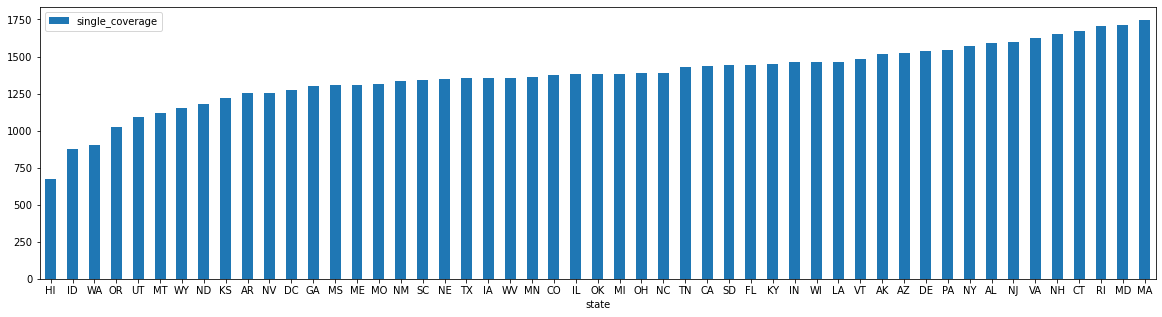

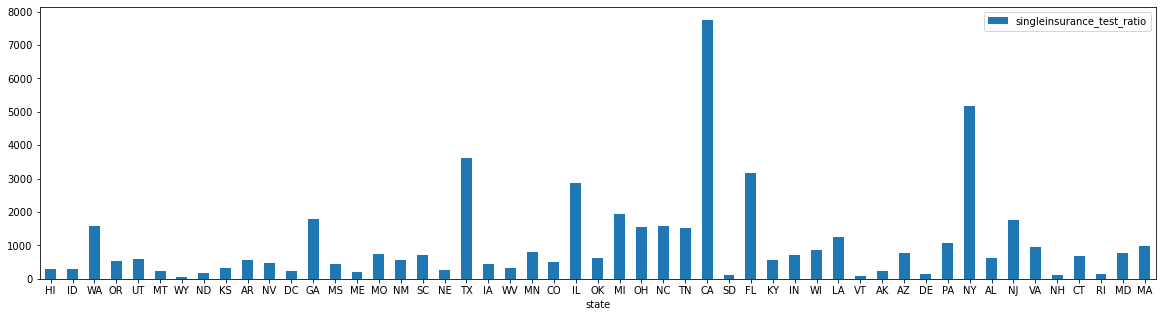

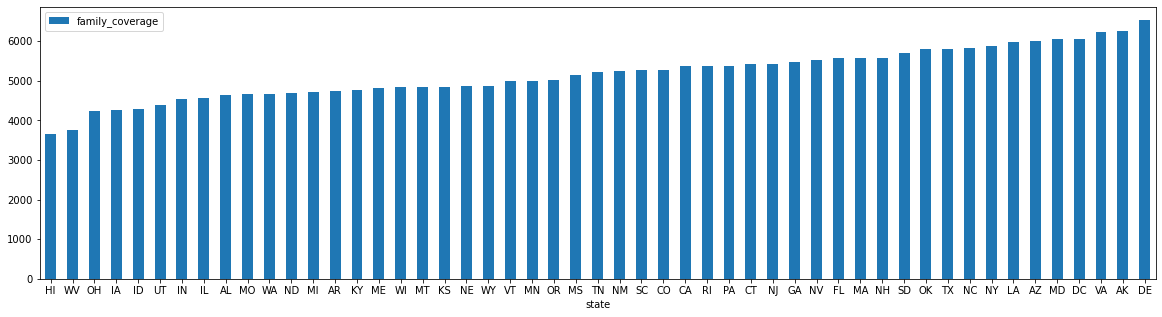

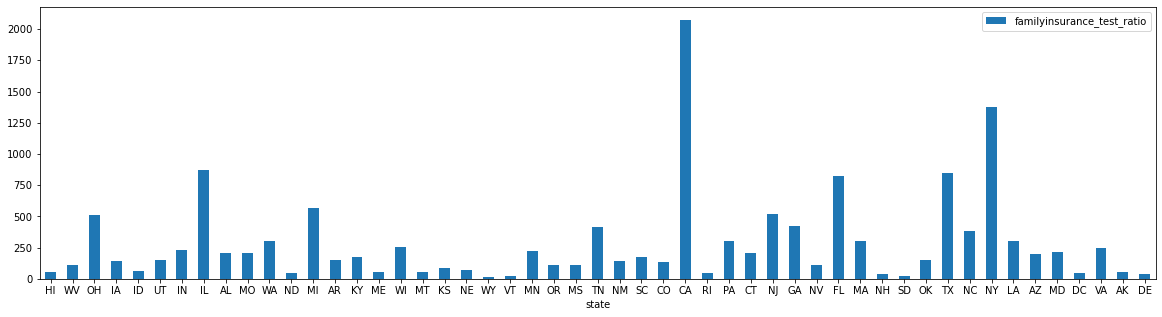

In [124]:
Increase_by_single = total.sort_values(by=['single_coverage']) #sorts the data from smallest single-payer cost to highest
Increase_by_family = total.sort_values(by=['family_coverage']) #does the same as above, but for the family coverage column

#The data has now been sorted by both increasing single-payer costs and increasing family costs of insurance. Now, it is time to see if there is a trend with raw testing statistics with average employer-granted health insurance costs

Singlepayer_graph = Increase_by_single.plot.bar(x='state', y='single_coverage', rot=0, figsize=(20,5))
SinglepayerVsTestgraph = Increase_by_single.plot.bar(x='state', y='singleinsurance_test_ratio', rot=0, figsize=(20,5))
Familypay_graph = Increase_by_family.plot.bar(x='state', y='family_coverage', rot=0, figsize=(20,5))
FamilypayVsTest_graph = Increase_by_family.plot.bar(x='state', y='familyinsurance_test_ratio', rot=0, figsize=(20,5))

#it would appear as though the ratio of health insurance costs do not correlate with the amount of tests given out in each state.
#Although these results are inconclusive, another variable in place of the number of tests might be more applicable, since the populations of each state are vastly different.


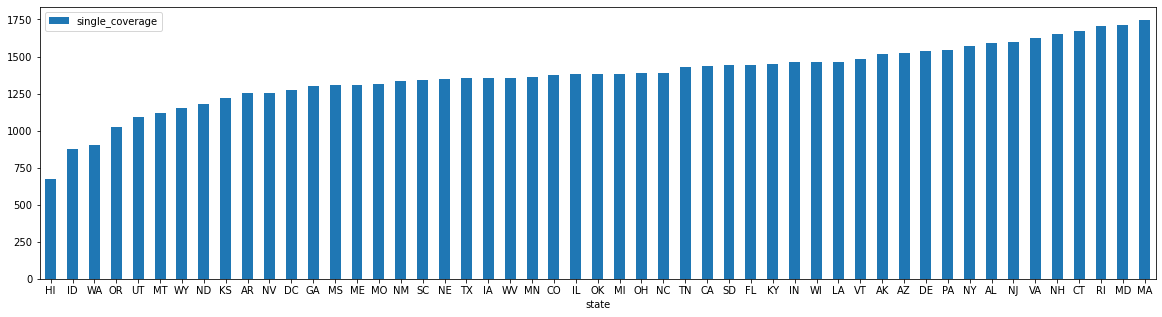

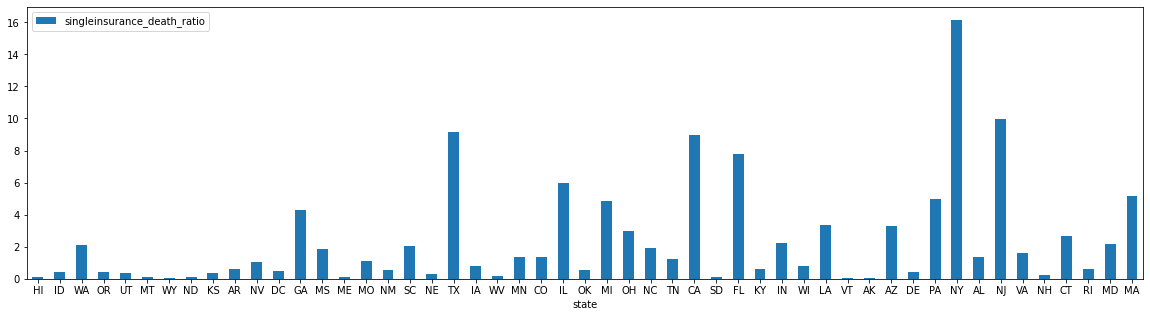

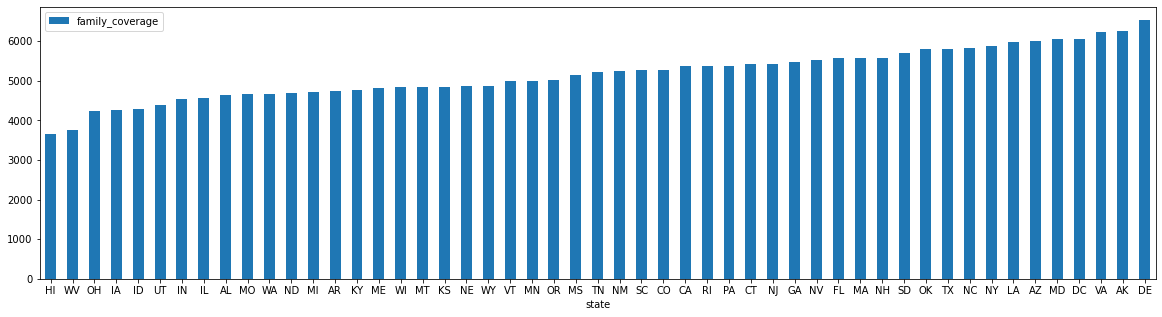

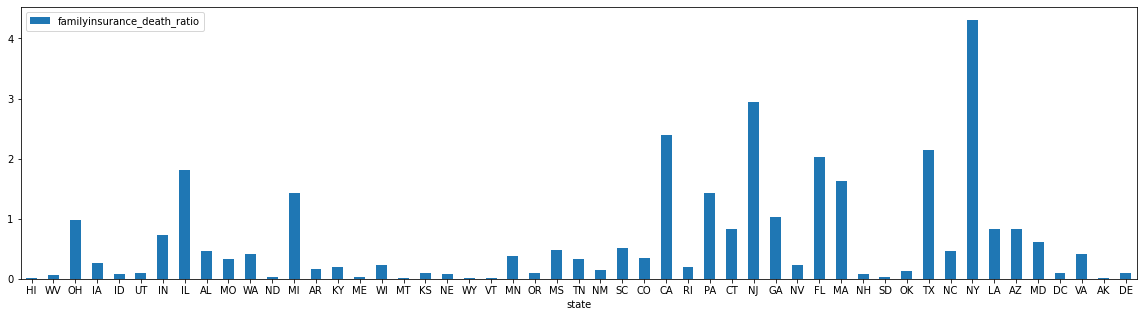

In [125]:
#Now, instead of looking at the ratio of health insurance costs to tests, I will now look at a ratio of insurance costs with mortality rates to see if there is a different outcome compared to the last analysis.


Singlepayer_graph = Increase_by_single.plot.bar(x='state', y='single_coverage', rot=0, figsize=(20,5))
SinglepayerVsDeath_graph = Increase_by_single.plot.bar(x='state', y='singleinsurance_death_ratio', rot=0, figsize=(20,5))
Familypay_graph = Increase_by_family.plot.bar(x='state', y='family_coverage', rot=0, figsize=(20,5))
FamilypayVsDeath_graph = Increase_by_family.plot.bar(x='state', y='familyinsurance_death_ratio', rot=0, figsize=(20,5))

#Once again, it appears as though no significant trend is found when comparing state health insurance costs to mortality statistics for COVID-19.


In [ ]:
#Overall, there do not seem to be any trends in insurance costs to raw covid test or mortality statistics. 
#However, more exploratory data analysis could likely be done to form a better connection between testing statistics and insurance costs, as total population was not considered.